In [1]:
import scipy.stats as sts
from scipy.special import erf
import numpy as np 
import math
import matplotlib.pyplot as plt
plt.style.use("dark_background")

***5. Предельные теоремы. Центральная предельная теорема***

***Теорема.*** Пусть $\xi_1, \xi_2,...,\xi_n$ независимы, одинаково распределеных, имеют конечное математическое ожидание $E_{\xi_i}=a$ и дисперсию $D_{\xi_i}=\sigma^2, \;\forall i = \overline{1, n}$. Тогда функция распределения центрированной и нормированной (стандартной) суммы этих случайных величин стремится при $n\to\infty$ к функции распределения стандартной нормальной случайной величины:
$$
\boxed{Z_n=\frac{\sum\limits_{i=1}^{n}\xi_i - E(\sum\limits_{i=1}^{n}\xi_i)}
    {\sqrt{D(\sum\limits_{i=1}^{n}\xi_i)}}=
\frac{\sum\limits_{i=1}^{n}\xi_i - na}{\sigma \sqrt{n}}}\;,
$$
$$
F_{Z_n}=P\{Z_n < x\} \xrightarrow[n\to\infty]{} 
    \Phi(x) =\frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{x}e^{-\frac{t^2}{2}}dt \notag
$$

Пусть $\{X_i\}_{i=1}^n$ - последовательность независимых одинаково распределенных биномиальных СВ $(X_i \sim Bin(n,p),\;i=\overline{1,n})$, а $S_n=\sum\limits_{i=1}^{n}X_i$. Проводится $k$ испытаний.

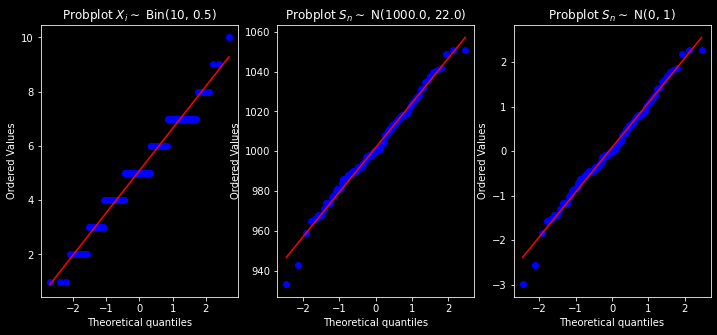

In [2]:
yy = []                                          # множество значений сумм случайных величин (предположительно должны распределяться нормально)
yy_stand = []                                    # множество центрированных и нормированных сумм yy СВ  должны распределяться стандартно
k = 100                                          # кол-во испытаний

for i in range(k):
    l, p, n = 10, 0.5, 200          # X ~ Bin(l, p), n - кол-во элементов последовательности
    X_i = sts.binom(l, p)           # генерируем биномиальную СВ X_i с заданными параметрами
    X = X_i.rvs(n)                  # образуем последовательность X_i, где i=1,n
    mean, disp = X_i.stats('mv')    # получаем матожидание и дисперсию X_i
    S_n = sum(X)                    # сумма n случайных величин
    yy.append(S_n)
    S_n_stand = (S_n - n*mean)/(np.sqrt(n*disp)) # центрируем и нормируем сумму последовательностей СВ 
    yy_stand.append(S_n_stand)          

fig, ax = plt.subplots(1, 3, figsize=(12, 5))            

sts.probplot(X, plot=ax[0])
sts.probplot(yy, plot=ax[1])
sts.probplot(yy_stand, plot=ax[2])

ax[0].set_title(r'Probplot $X_i \sim$ Bin({}, {})'.format(l, p))
ax[1].set_title(r'Probplot $S_n \sim$ N({}, {})'.format(round(n*mean), round(np.sqrt(n*disp))))
ax[2].set_title(r'Probplot $S_n \sim$ N(0, 1)')

plt.show()

In [3]:
# Удалить
x = 0.2
f = lambda x: erf(x/np.sqrt(2))/2
Ph = lambda x: math.erf(x/2**0.5)/2

f(x) == Ph(x)

False

***Пример*** Независимые СВ $X_i$ распределены равномерно на отрезке [0, 1]. Найти закон распределения СВ $$Y=\sum\limits_{i=1}^{100} X_i \notag,$$ а также вероятность того, что $55<Y<70$.

In [4]:
a, b = 0, 1       # x \in [0, 1]
delta = b - a
n = 100           # кол-во СВ

X_i = sts.uniform(a, delta)
rvs = X_i.rvs(n)
mean, var = X_i.stats('mv')
Y_mean, Y_sigma = n*mean, (n*var)**0.5
Y = rvs.sum()
print('Математическое ожидание Y: ', n*mean)
print('Среднеквадратическое отклонение', round(Y_sigma, 4))

Математическое ожидание Y:  50.0
Среднеквадратическое отклонение 2.8868


Т.к. мы находимся в условиях ЦПТ, то СВ $Y=\sum\limits_{i=1}^n X_i$ распределена по закону приближенному к закону нормального распределения с функцией плотности
$$ \notag
p_Y(y)\approx \frac{1}{\sigma_y\sqrt{2\pi}} e^{\frac{(y-mean)^2}{2 \sigma^2}} \Rightarrow  
    p_Y(y)\approx \frac{3}{5\sqrt{6\pi}}e^{\frac{3(y-50)^2}{50}}
$$
$
MX_i=\frac{0+1}{2}, DX_i=\frac{(1-0)^2}{12}=\frac{1}{12} \Rightarrow MY=50, DY=\frac{25}{3}, \sigma_y = \frac{5\sqrt{3}}{3}\approx2.8868
$

Центрируем СВ $Y$ и нормируем - СВ $Y'$ будет распределена по стандартному закону распределения $(Y'=\frac{Y-n \cdot mean}{\sqrt{n \cdot var}})$. Тогда 
$
P\{55<Y<70\}=P\{\frac{(70-50)}{\frac{5\sqrt{3}}{3}}<Y'<\frac{(70-50)}{\frac{5\sqrt{3}}{3}}=
    \Phi_0(4\sqrt3)-\Phi_0(\sqrt3) \approx 0.04
$

In [5]:
Phi = lambda t: math.erf(t/2**(0.5))/2  # функция Лапласа (нормированная) 
Y_ = lambda y: (y-Y_mean)/(Y_sigma)     # функция, центрирующая и нормирующая Y
res = Phi(Y_(70)) - Phi(Y_(55))
print('Вероятность того что 55 < Y < 70 равна ', round(res, 4))

Вероятность того что 55 < Y < 70 равна  0.0416


***Спр***  
$
\Phi_0(x) =\frac{1}{\sqrt{2\pi}}\int\limits_{0}^{x}e^{-\frac{t^2}{2}}dt = 
    \bigg[z = \frac{t}{\sqrt{2}}, \; t=\sqrt{2}z, \; dt = \sqrt{2} dz\bigg] = 
    \frac{1}{\sqrt{2\pi}}\int\limits_{0}^{\frac{x}{\sqrt2}}e^{-z^2} \sqrt{2} dz = \\
   = \frac{1}{2} \cdot \frac{2}{\sqrt{\pi}}\int\limits_{0}^{\frac{x}{\sqrt2}}e^{-z^2} dz = 
    \frac{1}{2} erf\big(\frac{x}{\sqrt2}\big) \Rightarrow 
$
        $$\boxed{\Phi_0(x) = \frac{1}{2} erf\big(\frac{x}{\sqrt2}\big)}$$

Так же, т.к. $ f(t) = e^{-\frac{t^2}{2}} = f(-t), \;
\Phi(\infty) = 1\Rightarrow \Phi_0(\infty)=\frac{1}{2} \Rightarrow
    \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{0} e^{-\frac{t^2}{2}} = \frac{1}{2} \Rightarrow$ $$\boxed{F(x) = \Phi(x) =  \frac{1}{2}  + \Phi_0(x)}$$

$
F(x)=P\{-\infty<\xi<x\}=
    \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{x}e^{-\frac{t^2}{2}}dt =
     \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{0}e^{-\frac{t^2}{2}}dt +
     \frac{1}{\sqrt{2\pi}}\int\limits_{0}^{x}e^{-\frac{t^2}{2}}dt = \frac{1}{2} + \Phi_0(x)
$

$
f(t) = e^{-\frac{t^2}{2}} = f(-t)
$

$
F(x)=P\{-\infty<\xi<x\}=
    \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{x}e^{-\frac{t^2}{2}}dt =
     \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{0}e^{-\frac{t^2}{2}}dt +
     \frac{1}{\sqrt{2\pi}}\int\limits_{0}^{x}e^{-\frac{t^2}{2}}dt = \frac{1}{2} + \Phi_0(x)
$

***Теорема (локальная теорема Муавра-Лапласа).***  Если вероятность $p$ наступления события $A$ $(P(A)=p,\;P(\overline A)=q)$ в каждом из $n$ испытаний постоянна и отлична от нуля и единицы, а число независимых испытаний достаточно велико, то вероятность $P_n(m)$ может быть вычислена по приближенной формуле
$$\boxed{ P_n(m) \approx \frac{1}{\sqrt{npq}} \cdot \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}, 
\text{ где } x=\frac{m-np}{\sqrt{npq}}}$$


***Теорема (интегральная теорема Муавра-Лапласа).***
Если вероятность $p$ наступления события $A$ $(P(A)=p,\;P(\overline A)=q)$ в каждом испытании постоянна и отлична от нуля и единицы, а число независимых испытаний достаточно велико, то вероятность $P_n$ того, что событие А в серии из n испытаний произойдет не менне $k_1$ раз и не более $k_2$ раз может быть найдена по приближенной формуле
$$
P(k_1 \leq A \leq k_2) = \Phi\bigg\{\frac{k_2-np}{\sqrt{npq}}\bigg\}-\Phi\bigg\{\frac{k_1-np}{\sqrt{npq}}\bigg\}, $$
 где $\Phi(x)=\frac{1}{\sqrt{2\pi}} \int\limits_{-\infty}^{x}e^{\frac{-t^2}{2}}dt$ - 
[функция Лапласа](http://0.0.0.0:8888/notebooks/%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D0%BD%D1%8B%D0%B5%20%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D1%8B.ipynb)

Пусть $\{{X_i}\}_{i=1}^n: X_i =
    \begin{cases}
       1 \text{, если } A\\
       0 \text{, если } \overline{A}\\
    \end{cases}, \;MX_i = p, \;DX_i=pq 
    \Rightarrow \\ 
    Mn_A = M\bigg(\sum\limits_{i=1}^{n}X_i\bigg)=np, \;\quad
    Dn_A = \bigg(\sum\limits_{i=1}^{n}X_i\bigg)=npq
$

С учетом того, что мы находимся в условиях центральной предельной теоремы, то
$$ \notag
Z_n=\frac{\sum\limits_{i=1}^{n}X_i - E(\sum\limits_{i=1}^{n}X_i)}
    {\sqrt{D(\sum\limits_{i=1}^{n}X_i)}}= \frac{n_A-np}{\sqrt{npq}} \Rightarrow
    Z_n \sim N(0,1) \text{ при }n\to\infty,
$$
т.к. $$MZ_n=M\bigg(\frac{n_A-np}{\sqrt{npq}}\bigg) = \frac{np-np}{\sqrt{npq}}=0 \notag$$ и
$$DZ_n=D\bigg(\frac{n_A-np}{\sqrt{npq}}\bigg) = \frac{1}{npq}Dn_A=\frac{npq}{npq}=1 \notag \Rightarrow$$
$$\Rightarrow P\{z_1 \leq Z_n \leq z_2\} \approx \Phi\big(\frac{z_2-0}{1}\big)-\Phi\big(\frac{z_1-0}{1}\big) =\Phi(z_2)-\Phi(z_1),$$ 
где $\Phi(z)=\frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{z}e^{-\frac{x^2}{2}}dx$

Полагая, что $ z_1 = \frac{k_1-np}{\sqrt{npq}}, \;\; z_2 = \frac{k_2-np}{\sqrt{npq}}, \;\;
    \frac{k_1-np}{\sqrt{npq}} \leq \frac{n_A-np}{\sqrt{npq}} \leq \frac{k_2-np}{\sqrt{npq}}
    \Rightarrow \boxed{P\{k_1 \leq n_A \leq k_2 \} = \Phi(z_2) - \Phi(z_1)}
$

***Задача*** Вероятность того, что сошедшая с конвейера делаль окажется бракованной, равна 0.1. Найти вероятность того, что из 600 деталей, сошедших с конвейера, 87 деталей окажутся бракованными.

In [6]:
n, m, p, q = 600, 87, 0.1, 1-p

phi = lambda x: sts.norm.pdf(x, loc=0, scale=1)   # функция Лапласа (не интеграл)
res = phi((m-n*p)/math.sqrt(n*p*q))/math.sqrt(n*p*q)
print(f'Вероятность того, что из {n} деталей, сошедших с конвейера, {m} деталей окажутся бракованными равна', round(res, 5))

Вероятность того, что из 600 деталей, сошедших с конвейера, 87 деталей окажутся бракованными равна 0.0


*Замечание.* С помощью функции Лапласа можно найти вероятность отклонения относительной частоты $\frac{n_A}{n}$ от вероятности $p$ в $n$ независимых испытаниях. Имеет место формула
$$ \boxed{
P\bigg\{\bigg|\frac{n_A}{n} - p \bigg| \leq \varepsilon \bigg\} = 2\Phi_0\bigg( \varepsilon \cdot \sqrt{\frac{n}{pq}}\bigg),
} \; \forall \varepsilon >0 \notag$$
$
\bigg|\frac{n_A}{n} - p \bigg| \leq \varepsilon  \Rightarrow 
    -\varepsilon \leq \frac{n_A}{n} - p \leq \varepsilon \Rightarrow \\
    \Rightarrow  P_n\{ np - n\varepsilon \leq n_A  \leq np + n\varepsilon \} \approx 
    \frac{1}{\sqrt{2\pi}}\displaystyle\int\limits_{-\varepsilon \cdot \sqrt{\frac{n}{pq}}}^{\varepsilon \cdot \sqrt{\frac{n}{pq}}}e^{-\frac{t^2}{2}}dt = 
    \frac{2}{\sqrt{2\pi}}\displaystyle\int\limits_{0}^{\varepsilon \cdot \sqrt{\frac{n}{pq}}}e^{-\frac{t^2}{2}}dt = 2\Phi_0\bigg( \varepsilon \cdot \sqrt{\frac{n}{pq}}\bigg)
$

***Задача.*** Вероятсность попадания в цель при одном выстреле равна 0.6. Найти вероятность того, что при $n=1200$ независимых выстрелах отклонение "частости" от вероятности по модулю не превышает $\varepsilon$=500.

In [7]:
n, eps, p = 1200, 0.05, 0.6
q = 1-p

Phi = lambda t: round(math.erf(t/2**0.5)/2, 4)
t = eps*(n/(p*q))**0.5
interval = 2*Phi(t)
ans = f'Вероятность того, что при указанных условиях "частость" отклониться от вероятности попасть в цель равна {interval}'
print(ans)

Вероятность того, что при указанных условиях "частость" отклониться от вероятности попасть в цель равна 0.9996
